In [3]:
# Continuous Obstacle Avoidance with DDPG network use picture input

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from MazeEnv_Continuous_Pic import MazeSimulator
from DDPG_Agent_Conv import DDPG_Agent_Conv
import gym
import random
from IPython.display import clear_output
import time

settings = {
    'objects': [
        'friend',
        'enemy',
    ],
    'colors': {
        'hero':   'yellow',
        'friend': 'green',
        'enemy':  'red',
    },
    'object_reward': {
        'obstacle': -1,
        'wall': -1,
    },
    'hero_bounces_off_walls': False,
    'enemy_move':True,
    'world_size': (500,500),
    'hero_initial_position': [250, 250],
    'hero_initial_speed':    [0,   0],
    "maximum_speed":         [10, 10],
    "enemy_max_speed":       [50, 50],
    'max_angular_speed':1,
    'max_line_speed':50,
    'max_line_acc':200,
    "object_radius": 15.0,
    "hero_radius": 10,
    "num_objects": {
        "friend" : 0,
        "enemy" :  20,
    },
    'num_action':2,
    'num_state':48,
    "sim_dt":0.1,
    'DDPG':{
        'net_structure':'CONV',
        'learning_rate_A':0.0001,
        'learning_rate_C':0.001,
        'gamma':0.99,
        'batch_size':32,
        'replay_buffer_size':1000000,
        'soft_update_rate':0.001,
        'USECONV':False,
        'num_conv1':32,
        'num_conv2':64,
        'num_fc1':512,
        'num_fc2':128,
    }
}
DEBUG = False
sim = MazeSimulator(settings)
tf.reset_default_graph()
sess = tf.Session()
agent = DDPG_Agent_Conv(settings, sess)
if DEBUG:
    MaxEpisode = 1
    MaxStep = 1
else:
    MaxEpisode = 50000
    MaxStep = 1000
sigma = 0.5
trainsteps = 0
rlog = []
for episode in range(MaxEpisode):
    sim = MazeSimulator(settings)
    s = sim.observe()
    rsum = 0
    losslog = []
    for step in range(MaxStep):
        action = sess.run(agent.A, feed_dict={agent.S:s})[0]
        a0 = np.clip(np.random.normal(action[0], sigma), -1, 1)
        a1 = np.clip(np.random.normal(action[1], sigma), -1, 1)

        action = [float(a0), float(a1)]
        s1, r, d = sim.step(*action)
        agent.buffer_add(s, action, r, s1, d)
        rsum += r
        # train
        if agent.buffer_ready:
            loss = agent.train_it()
            losslog.append(loss)
            trainsteps += 1
            sigma *= 0.999999
        s = s1
        #sim.draw([action, r])
        
        
    # End of Episode
    rlog.append(rsum)
    if episode % 100 == 0:
        plt.plot(rlog)
        plt.show()
        
    if agent.buffer_ready:
        print trainsteps, 'Episode', episode, 'rsum:', rsum, 'sigma:', sigma
    else:
        print trainsteps, 'Episode', episode, 'rsum:', rsum, 'lenbuff', len(agent.exp_buffer)

0.0159430503845
0.0120990276337
0.0117659568787
0.0131139755249
0.0117588043213
0.0178101062775
0.0153539180756
0.0104579925537
0.012326002121
0.0100009441376
0.0104060173035
0.0107429027557
0.0124430656433
0.0104351043701
0.0357220172882
0.0148069858551
0.0152189731598
0.0109221935272
0.0101919174194
0.0119180679321
0.0110719203949
0.0100247859955
0.0109448432922
0.010183095932
0.0106859207153
0.0101428031921
0.0100839138031
0.0108151435852
0.011293888092
0.0104761123657
0.0132210254669
0.012932062149
0.0112228393555
0.0104548931122
0.0111458301544
0.0111770629883
0.0102350711823
0.0108540058136
0.00991106033325
0.00989317893982
0.014347076416
0.0105102062225
0.0255270004272
0.0118701457977
0.0159001350403


KeyboardInterrupt: 

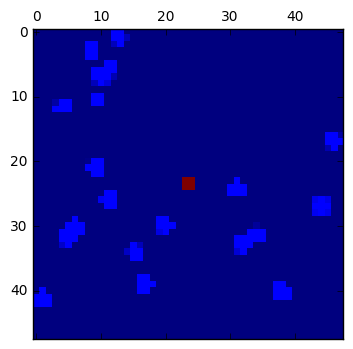

In [5]:
s = np.reshape(s,[48,48])
plt.matshow(s)
plt.show()

In [ ]:
plt.plot(rlog)
plt.show()

In [ ]:
demo_episode = 10
demo_step = 500
for episode in range(demo_episode):
    sim = MazeSimulator(settings)
    s = sim.observe()
    rsum = 0
    for step in range(demo_step):
        action = sess.run(agent.A, feed_dict={agent.S:[s]})[0]
        a0 = np.clip(np.random.normal(action[0], sigma), -1, 1)
        a1 = np.clip(np.random.normal(action[1], sigma), -1, 1)
        s1, r, d = sim.step(float(a0), float(a1))
        sim.draw([action,r])
        s = s1
        if d: break

In [11]:
a = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]])
b = np.reshape(a, [3,2,2])
print b

[[[1 2]
  [3 4]]

 [[1 2]
  [3 4]]

 [[1 2]
  [3 4]]]
